In [1]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

with open('Data/sarcasm.json', 'r') as f:
    datastore = json.load(f)

In [4]:
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [8]:
word_index = tokenizer.word_index

In [9]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [14]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data = (testing_padded, testing_labels), verbose=1)

W0905 04:59:21.201786 140325819664192 deprecation.py:323] From /opt/tljh/user/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 4s 225us/sample - loss: 0.4752 - accuracy: 0.7581 - val_loss: 0.4053 - val_accuracy: 0.8155
Epoch 2/50
20000/20000 [==============================] - 4s 186us/sample - loss: 0.3615 - accuracy: 0.8389 - val_loss: 0.3932 - val_accuracy: 0.8247
Epoch 3/50
20000/20000 [==============================] - 4s 189us/sample - loss: 0.3236 - accuracy: 0.8579 - val_loss: 0.3929 - val_accuracy: 0.8250
Epoch 4/50
20000/20000 [==============================] - 4s 189us/sample - loss: 0.2931 - accuracy: 0.8729 - val_loss: 0.3989 - val_accuracy: 0.8211
Epoch 5/50
20000/20000 [==============================] - 4s 190us/sample - loss: 0.2579 - accuracy: 0.8920 - val_loss: 0.4287 - val_accuracy: 0.8147
Epoch 6/50
20000/20000 [==============================] - 4s 190us/sample - loss: 0.2246 - accuracy: 0.9094 - val_loss: 0.4557 - val_accuracy: 0.8095
Epoch 7/50
20000/20000 [===========================

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

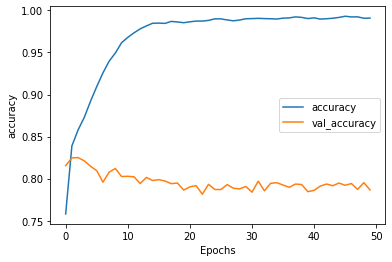

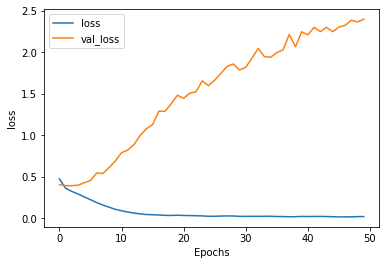

In [16]:
plot_graphs(history, 'accuracy');
plot_graphs(history, 'loss');